In [1]:
import numpy as np
import vtk as vtk
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))

import modules.vascular_data as sv

In [2]:
img = np.random.randn(100,100)

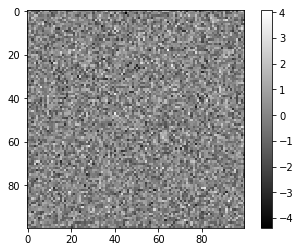

In [3]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

In [4]:
smooth = vtk.vtkImageGaussianSmooth()

In [5]:
vtk_im = sv.VTKNumpytoSP(img)

In [6]:
smooth.SetInputData(vtk_im)
smooth.SetStandardDeviation(3)
smooth.Update()

In [7]:
vtk_im_smoothed = smooth.GetOutput()

In [8]:
img_smooth = sv.vtk_image_to_numpy(vtk_im_smoothed)

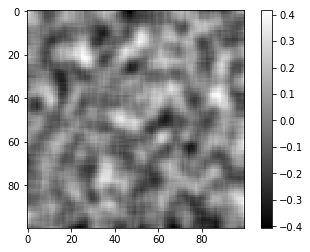

In [9]:
plt.figure()
plt.imshow(img_smooth[:,:,0], cmap='gray')
plt.colorbar()
plt.show()

In [10]:
from skimage import filters
im_smooth_2 = filters.gaussian(img, sigma=3)

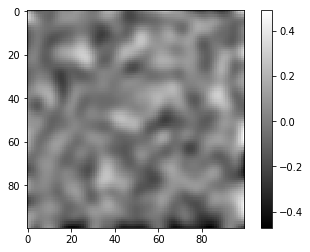

In [11]:
plt.figure()
plt.imshow(im_smooth_2, cmap='gray')
plt.colorbar()
plt.show()

In [12]:
def gauss_filter(img, sigma=3, trunc=4):
    b = sigma*trunc
    x = np.arange(-b,b+1)
    
    X,Y = np.meshgrid(x,x)
    
    d = (X**2+Y**2)/(2*sigma**2)
    
    f = 1.0/(2*np.pi*sigma**2)*np.exp(-d)
    
    H,W = img.shape
    im_pad = np.zeros((H+2*b, W+2*b))
    im_pad[b:H+b,b:W+b] = img
    
    out = np.zeros((H,W))
    print(f.shape)
    for i in range(b,H+b):
        for j in range(b,W+b):
            out[i-b,j-b] = np.sum(im_pad[i-b:i+b+1,j-b:j+b+1]*f)
            
    return out

In [13]:
img_my_smooth = gauss_filter(img,sigma=3)

(25, 25)


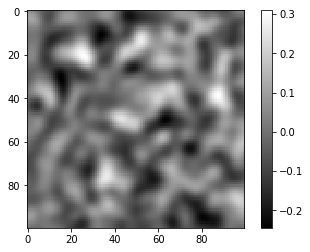

In [14]:
plt.figure()
plt.imshow(img_my_smooth, cmap='gray')
plt.colorbar()
plt.show()